In [1]:
# Import libraries and settings
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (12, 12)
matplotlib.rcParams.update({'font.size': 24})
from matplotlib.ticker import MaxNLocator
import seaborn as sns
sns.set(font_scale=0.8) 

### The power of separating variables

#### A simple example with some artificial ideal data: Facebook VS TikTok users. Is "AGE" a variable that has "separating power"? In other words, does "AGE" tell me whether a user will use Facebook or TikTok?

In [2]:
random_20s = pd.DataFrame(np.transpose([np.random.normal(20, 3, 10000)]), columns = ['AGE'])
random_20s['SOCIAL_MEDIA'] = 'TikTok'
random_40s = pd.DataFrame(np.transpose([np.random.normal(40, 3, 10000)]), columns = ['AGE'])
random_40s['SOCIAL_MEDIA'] = 'Facebook'
age_social_media = pd.concat([random_20s, random_40s], axis=0)
age_social_media

,AGE,SOCIAL_MEDIA
0,19.615742,TikTok
1,19.943174,TikTok
2,18.057384,TikTok
3,19.970541,TikTok
4,18.672936,TikTok
...,...,...
9995,39.343528,Facebook
9996,44.322706,Facebook
9997,39.255181,Facebook
9998,43.772006,Facebook


#### We just generated some random age values from a normal distribution. The TikTok users have a mean of 20 years age with a standard deviation of 3. The Facebook users have a mean of 40 and the same std. Now let's plot the histogram.

Text(6.058164500000004, 0.5, 'Counts of users')

<Figure size 360x360 with 0 Axes>

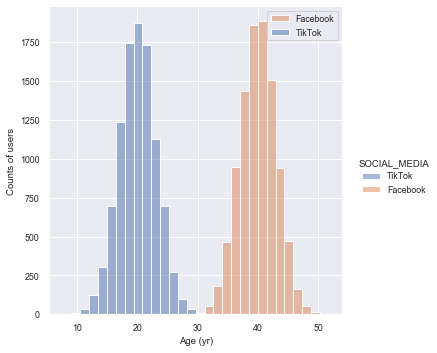

In [4]:
column = ['TikTok', 'Facebook']
plt.figure(figsize=(5,5))
sns.displot(data = age_social_media, x ='AGE', hue = 'SOCIAL_MEDIA')
plt.legend(('Facebook', 'TikTok'))
plt.xlabel('Age (yr)')
plt.ylabel('Counts of users')

#### CONCLUSION: We can tell that AGE has a great power in separating TikTok and Facebook users in this artificial dataset. I can use AGE to make an estimate of whether someone is using one or the other social medium. Of course, things are not that simple as we will see in the following real life example.

### Credit card default data set from UCI-ML Repository [link to dataset](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)
#### A classification problem with: 
- 30,000 client data, 
- 23 variables (or inputs), 
- 1 binary output: Default payment (Yes=1, No=0)
- no missing values

### PROBLEM STATEMENT: Predict the probability that a client will default

- Import the data and view them
- Explore the distribution of the OUTPUT
- Comment on BALANCED vs UNBALANCED problems

In [5]:
# Import data and rename column
cc_data = pd.read_excel('cc_data_uci.xls')
cc_data.rename(columns={'default payment next month': 'OUTPUT'}, inplace = True)
cc_data.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,OUTPUT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,20000,1,3,2,35,-2,-2,-2,-2,-1,...,0,13007,13912,0,0,0,13007,1122,0,0


In [6]:
# Count the +ve and -ve outputs
cc_data.OUTPUT.value_counts()

0    23364
1     6636
Name: OUTPUT, dtype: int64

- 78\% of the clients (i.e. 23,364) in the data set did not default (OUTPUT = 0)
- 22\% of the clients (i.e. 6,636) in the data set defaulted/did not pay their credit card balance (OUTPUT = 1)
- This is called an UNBALANCED dataset/problem (although slightly unbalanced).
- It is not heavily unbalanced though and does not (probably) need any special treatment. 
- In fault or fraud problems the distribution of the outputs may look like: 0.0001\% FAULTY vs 99.9999% NOT FAULTY.
- These problems need special considerations.

### Some exploratory data analysis. Any variables with separating power? <br> Let's look at correlations between the inputs and the output.

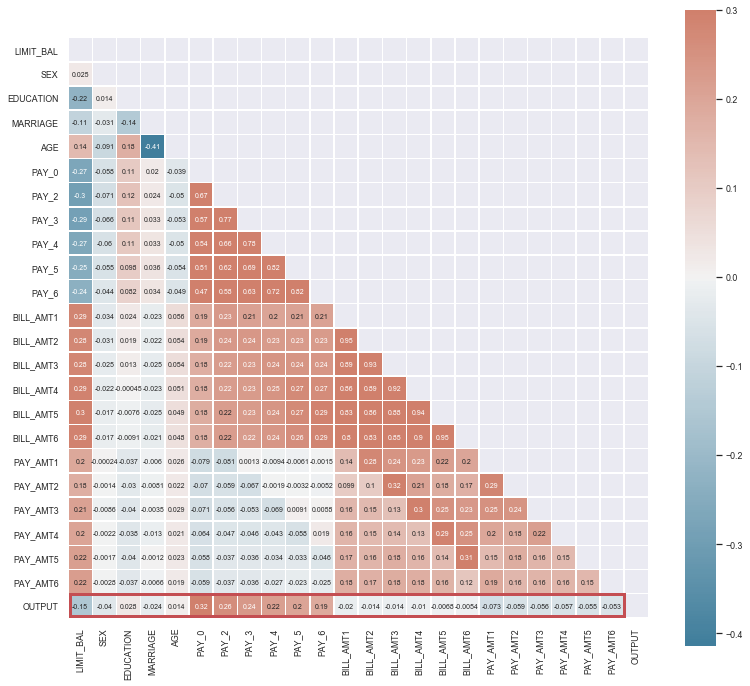

In [7]:
# Compute the correlation matrix
corr = cc_data.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(13, 13))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
heat = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .9}, annot=True, annot_kws={"size":7})

import matplotlib.patches as patches
# Create a Rectangle patch
rect = patches.Rectangle((0.1,23),22.9,0.9,linewidth=3,edgecolor='r',facecolor='none')
# Add the patch to the Axes
ax.add_patch(rect)

### The variables with the highest correlation with the OUTPUT are:
- LIMIT_BAL: -0.15
- PAY_0: 0.32
- PAY_2: 0.26

### Let's visualize the correlations in different ways to see if there are any obvious separating power.

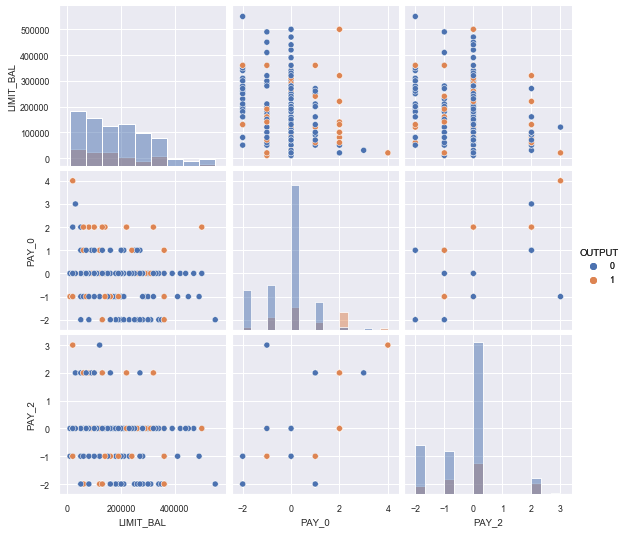

In [10]:
g = sns.pairplot(cc_data[['LIMIT_BAL', 'PAY_0', 'PAY_2', 'OUTPUT']].sample(n=200, random_state=1),\
                 hue="OUTPUT", kind='scatter', diag_kind='hist') # point out imbalanced dataset and switch diag_kind from 'hist' to 'kde'
g.map_offdiag(sns.scatterplot)
g.add_legend()

#### We don't see any separation between 0-1 in both the diagonal histograms (1-parameter at a time) and the off-diagonal biplots (2-parameters at a time)
- For this problem, plot the kde instead of the hist on the diagonal. Continuous kde visuals look nicer generally, but be conscious of the [bandwidth selection](https://en.wikipedia.org/wiki/Kernel_density_estimation).

#### Next, we use the [Seaborn's jointplot](http://seaborn.pydata.org/generated/seaborn.jointplot.html) to plot the bivariate graph of two variables grouped by their output. THIS REQUIRES SEABORN VERSION 0.11.0. Check your version with "sns.\_\_version__" and update from Anaconda Navigator

0.11.0


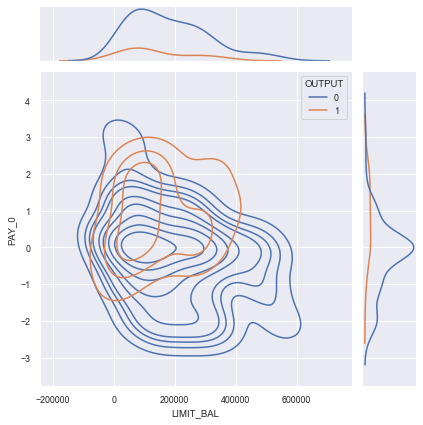

In [11]:
print(sns.__version__)
sns.jointplot(data=cc_data.sample(n=100, random_state=1), x="LIMIT_BAL", y="PAY_0", hue="OUTPUT", kind='kde')

#### The visualization above shows the distribution in a bivariate plot as a "map". The inner circles show areas of high density. Therefore, we see that most data points for both 0,1 OUTPUT values overlap in the area around (50000, 0)

### CONCLUSION: There is no variable or combination of two variables that can separate well the 0-1 OUTPUT values. This is a real life problem and the answer is not straight-forward. Thus, we will look into a simple but more powerful classification technique.